In [25]:
# 1.  날씨 관측 데이터 읽기 (data-files/seoul-temperature.csv)

with open("data-files/seoul-temperature.csv", "rt", encoding="UTF-8") as f:
    lines = f.readlines() # 파일 전체를 읽어서 행렬로 구분한 후 리스트에 담아서 반환

# 2.  각 항의 데이터를 쉼표를 기준으로 분리해서 리스트로 반환

print(lines[1])
rows = []
invalid_rows = []
for data in lines[1:]:
    row = data.split(',')
    try:
        date = row[0].split("-")
        for i in range(len(date)):
            date[i] = int(date[i].lstrip('0'))
        
        row[0] = date
        
        row[1] = float(row[1])
        row[2] = float(row[2])
        row[3] = float(row[3])
        row[4] = float(row[4].replace('\n', ''))
        rows.append(row)
    except:
        # print(data,row)
        invalid_rows.append(row)
    

print(rows[:2])


# 최고기온 컬럼에서 가장 큰 값 찾기
max_temp = -9999

for row in rows:
    if (max_temp < row[4]):
        max_temp = row[4]
print(max_temp)

# 최고기온 컬럼에서 가장 큰 값이 포함된 행 찾기 
max_temp_row = rows[0]

for row in rows[1:]:
    if (max_temp_row[4] < row[4]):
        max_temp_row = row
print(max_temp_row)

# 최저기온 컬럼에서 가장 작은 값이 포함된 행 찾기

min_temp_row = rows[0]

for row in rows[1:]:
    if (min_temp_row[3] > row[3]):
        min_temp_row = row
print(min_temp_row)

# 5월 중에 가장 추웠던 날과 가장 더웠던 날 찾기

max_temp = None
min_temp = None

for row in rows[1:]:
    if (row[0][1] == 5):
        if ((max_temp==None) or (max_temp[4] < row[4])): max_temp = row
        if ((min_temp==None) or (min_temp[3] > row[3])): min_temp = row
print(max_temp, min_temp)

# 내 생일 중 가장 더웠던 날 / 가장 추웠던 날 찾기

birthday = [10,20]
max_temp = None
min_temp = None

for row in rows[1:]:
    if (row[0][1:] == birthday):
        if ((max_temp==None) or (max_temp[4] < row[4])): max_temp = row
        if ((min_temp==None) or (min_temp[3] > row[3])): min_temp = row
print(max_temp, min_temp)

# 내가 태어난 날의 기온

birthday = [2006,10,20]

for row in rows:
    if (row[0] == birthday):
        print(row)
        break

# 일교차가 가장 컸던 날 / 작었던 날
max_temp = None
min_temp = None

for row in rows[1:]:
    deltaTemp = (row[4]-row[3])
    if ((max_temp==None) or ((max_temp[4]-max_temp[3]) < deltaTemp)): max_temp = row
    if ((min_temp==None) or (min_temp[4]-min_temp[3] > deltaTemp)): min_temp = row
print(max_temp, min_temp)



1907-10-01,108,13.5,7.9,20.7

[[[1907, 10, 1], 108.0, 13.5, 7.9, 20.7], [[1907, 10, 2], 108.0, 16.2, 7.9, 22.0]]
39.6
[[2018, 8, 1], 108.0, 33.6, 27.8, 39.6]
[[1927, 12, 31], 108.0, -15.3, -23.1, -6.4]
[[1950, 5, 30], 108.0, 24.2, 17.1, 34.4] [[1917, 5, 2], 108.0, 9.5, 2.4, 16.3]
[[1940, 10, 20], 108.0, 17.8, 10.1, 26.2] [[1924, 10, 20], 108.0, 5.4, -1.5, 13.0]
[[2006, 10, 20], 108.0, 19.1, 16.0, 23.5]
[[1942, 4, 19], 108.0, 12.7, 2.5, 24.3] [[1969, 1, 27], 108.0, -0.1, -0.4, 0.6]


In [26]:
# !명령어 -> 터미널에서 실행효과
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777836

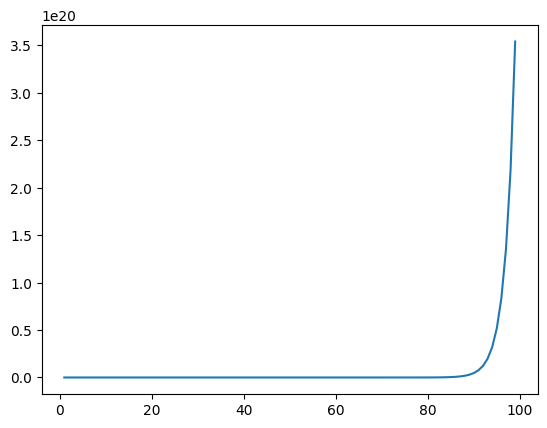

In [70]:
# 선 그래프 그리기
import matplotlib.pyplot as plt

# plt.plot([10,20,30,50,80])           # y축의 값 (x축은 자동으로 설정)
# plt.plot([1,2,3,4,5],[10,20,30,50,80]) # x축, y축
# plt.show()

n = 100
numList = [1,1]
indexList = [1,2]
for i in range(2,n):
    numList.append(numList[i-2]+numList[i-1])
    indexList.append(i)

print(numList)
plt.plot(indexList, numList)
plt.show()


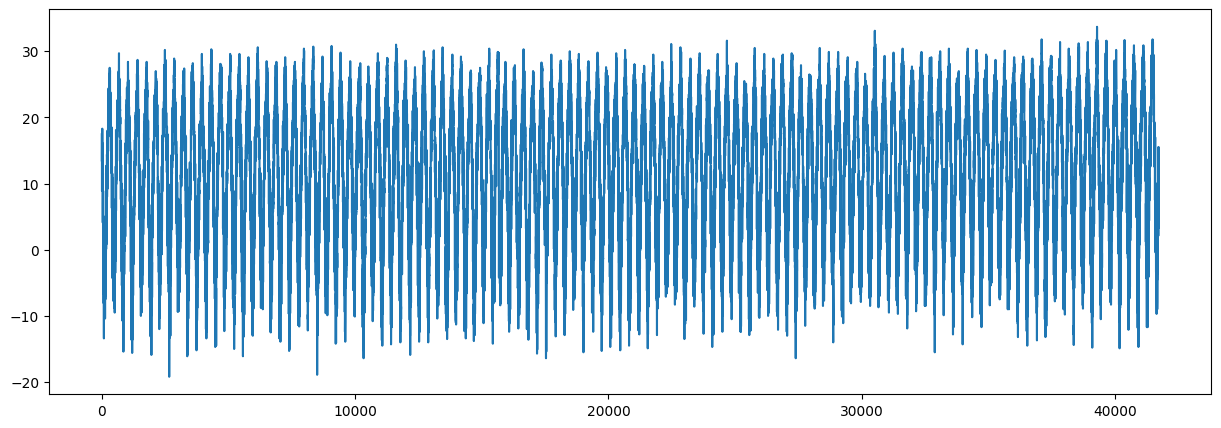

In [37]:
# 전체 데이터의 평균 기온만 뽑아서 선 그래프 그리기
all_avg_temp = []
for row in rows:
    all_avg_temp.append(row[2])

plt.figure(figsize=(15,5)) # 그래프의 표시 영역의 크기를 15 x 5로 변경
plt.plot(all_avg_temp)
plt.show()

[1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]


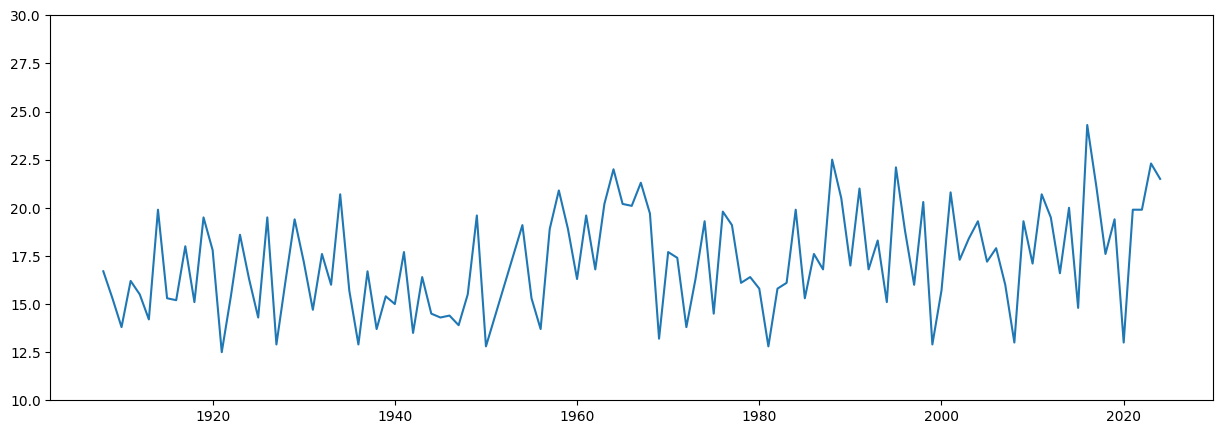

In [62]:
# 매년 5월 19일의 평균 기온 데이터를 뽑아서 선 그래프 그리기
day = [5,19]
all_avg_temp = []
all_years = []
for row in rows:
    if (row[0][1:] == day):
        all_avg_temp.append(row[2])
        all_years.append(row[0][0])

plt.xticks = [ y for y in all_years if y % 5 == 0]
#plt.xticks(rotation=270)
print(plt.xticks)

plt.figure(figsize=(15,5)) # 그래프의 표시 영역의 크기를 15 x 5로 변경
plt.ylim(10,30)            # 범위 제한

plt.plot(all_years, all_avg_temp)
plt.show()